<a href="https://colab.research.google.com/github/Kennethfargose/Text-to-image/blob/main/text2img_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
physical_devices = tf.config.list_physical_devices('GPU')


from tensorflow.keras.layers import Dense, RNN, LSTM, Flatten, TimeDistributed, LSTMCell,BatchNormalization
from tensorflow.keras.layers import RepeatVector, Conv2D, SimpleRNN, GRU, Reshape, ConvLSTM2D, Conv2DTranspose, MaxPooling2D
from tensorflow.keras import backend as K

from tensorflow.keras.layers import Dense, RNN, LSTM, Flatten, TimeDistributed, LSTMCell
from tensorflow.keras.layers import RepeatVector, Conv2D, SimpleRNN, GRU, Reshape, ConvLSTM2D, Conv2DTranspose

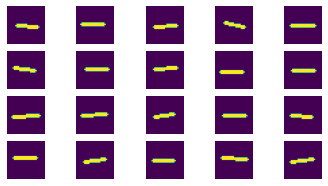

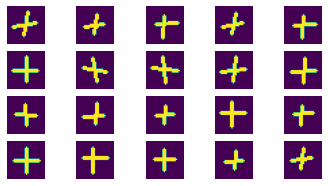

In [ ]:
# Create plus/minus signs
def generate_images(cross=False, n=50):
    x = np.random.randint(12, 16, (n, 2))
    y1 = np.random.randint(4, 8, n)
    y2 = np.random.randint(20, 24, n)
    
    blank = np.zeros([n, 28, 28])
    for i in range(n):
        line = cv2.line(blank[i], (y1[i], x[i,0]), (y2[i], x[i, 1]), (255,0,0), 2, cv2.LINE_AA)
        if cross:
            line = cv2.line(blank[i], (x[i,0], y1[i]), (x[i, 1], y2[i]), (255,0,0), 2, cv2.LINE_AA)

    return blank

def show_generated(images):
    for i in range(20):
        plt.subplot(5, 5, i+1)
        plt.axis('off')
        plt.imshow(images[i])
    plt.show()

show_generated(generate_images())
show_generated(generate_images(cross=True))

In [ ]:
import random

def create_data(highest_integer):
    """
    Creates the following data for all pairs of integers up to [highest integer]+[highest_integer]:

    @return:
    X_text: '151+ 21' -> text query of an arithmetic operation
    X_img : Stack of MNIST images corresponding to the query (7 x 28 x 28)
    y_text: ' 172' -> answer of the arithmetic text query
    y_img :  Stack of MNIST images corresponding to the answer (4 x 28 x 28)

    Images for digits are picked randomly from the whole MNIST dataset.
    """

    num_indices = [np.where(MNIST_labels==x) for x in range(10)]
    num_data = [MNIST_data[inds] for inds in num_indices]
    image_mapping = dict(zip(unique_characters[:10], num_data))
    image_mapping['-'] = generate_images()
    image_mapping['+'] = generate_images(cross=True)
    image_mapping[' '] = np.zeros([1, 28, 28])

    X_text, X_img, y_text, y_img = [], [], [], []
    for i in range(highest_integer + 1):
        for j in range(highest_integer + 1):
            
            i_char = to_padded_chars(i, max_len=max_int_length)
            j_char = to_padded_chars(j, max_len=max_int_length)

            for sign in ['-', '+']:
                query_string = i_char + sign + j_char
                query_image = []
                for n, char in enumerate(query_string):
                    image_set = image_mapping[char]
                    index = np.random.randint(0, len(image_set), 1)
                    query_image.append(image_set[index].squeeze())

                result = eval(query_string)
                result_string = to_padded_chars(result, max_len=max_answer_length)
                result_image = []
                for n, char in enumerate(result_string):
                    image_set = image_mapping[char]
                    index = np.random.randint(0, len(image_set), 1)
                    result_image.append(image_set[index].squeeze())

                X_text.append(query_string)
                X_img.append(np.stack(query_image))
                y_text.append(result_string)
                y_img.append(np.stack(result_image))
            
    return np.stack(X_text), np.stack(X_img)/255., np.stack(y_text), np.stack(y_img)/255.
  
def to_padded_chars(integer, max_len=3, pad_right=False):
    """
    Returns a string of len()=max_len, containing the integer padded with ' ' on either right or left side
    """
    length = len(str(integer))
    padding = (max_len - length) * ' '
    if pad_right:
        return str(integer) + padding
    else:
        return padding + str(integer)


11501568/11490434 [==============================] - 0s 0us/step
(80000,) (80000, 7, 28, 28) (80000,) (80000, 4, 28, 28)
Sample ID: 44293

X_text: "110+146" = y_text: " 256"


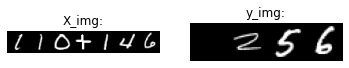

Sample ID: 29580

X_text: " 73-190" = y_text: "-117"


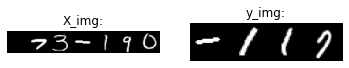

Sample ID: 64165

X_text: "160+ 82" = y_text: " 242"


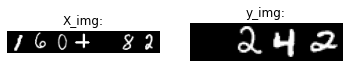

Sample ID: 70794

X_text: "176-197" = y_text: " -21"


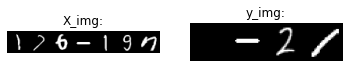

Sample ID: 14864

X_text: " 37- 32" = y_text: "   5"


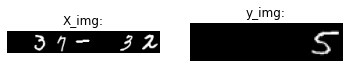

Sample ID: 25991

X_text: " 64+195" = y_text: " 259"


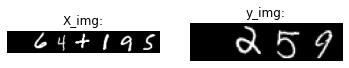

Sample ID: 53609

X_text: "134+  4" = y_text: " 138"


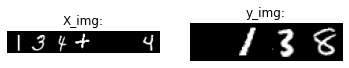

Sample ID: 37175

X_text: " 92+187" = y_text: " 279"


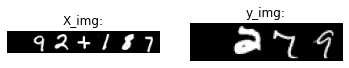

Sample ID: 76330

X_text: "190-165" = y_text: "  25"


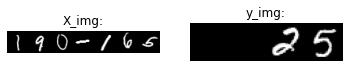

Sample ID: 20798

X_text: " 51-199" = y_text: "-148"


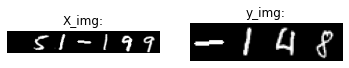

In [ ]:
# Illustrate the generated query/answer pairs

unique_characters = '0123456789+- ' # All unique characters that are used in the queries (13 in total: digits 0-9, 2 operands [+, -], and a space character ' '.)
highest_integer = 199 # Highest value of integers contained in the queries
max_int_length = len(str(highest_integer)) # 
max_query_length = max_int_length * 2 + 1 # Maximum length of the query string (consists of two integers and an operand [e.g. '22+10'])
max_answer_length = max_int_length + 1    # Maximum length of the answer string

# Create the data (might take around a minute)
(MNIST_data, MNIST_labels), _ = tf.keras.datasets.mnist.load_data()
X_text, X_img, y_text, y_img = create_data(highest_integer)
print(X_text.shape, X_img.shape, y_text.shape, y_img.shape)


## Display the samples that were created
def display_sample(n):
    labs = ['X_img:', 'y_img:']
    for i, data in enumerate([X_img, y_img]):
        plt.subplot(1,2,i+1)
        plt.axis('off')
        plt.title(labs[i])
        plt.imshow(np.hstack(data[n]), cmap='gray')
    print('='*50, f'\nSample ID: {n}\n\nX_text: "{X_text[n]}" = y_text: "{y_text[n]}"')
    plt.show()

for _ in range(10):
    display_sample(np.random.randint(0, 80000, 1)[0])

In [ ]:
# One-hot encoding/decoding the text queries/answers so that they can be processed using RNNs
# You should use these functions to convert your strings and read out the output of your networks

def encode_labels(labels, max_len=4):
    n = len(labels)
    length = len(labels[0])
    char_map = dict(zip(unique_characters, range(len(unique_characters))))
    one_hot = np.zeros([n, length, len(unique_characters)])
    for i, label in enumerate(labels):
        m = np.zeros([length, len(unique_characters)])
        for j, char in enumerate(label):
            m[j, char_map[char]] = 1
        one_hot[i] = m

    return one_hot 

def decode_labels(labels):
    pred = np.argmax(labels, axis=1)
    predicted = ''.join([unique_characters[i] for i in pred])

    return predicted

X_text_onehot = encode_labels(X_text)
y_text_onehot = encode_labels(y_text)

print(X_text_onehot.shape, y_text_onehot.shape)

(80000, 7, 13) (80000, 4, 13)


In [ ]:
(img_rows, img_cols) = X_img[0,0].shape
if K.image_data_format() == 'channels_first':
    X_img = X_img.reshape(X_img.shape[0], max_query_length,1, img_rows, img_cols)
    y_img = y_img.reshape(y_img.shape[0], max_answer_length,1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_img = X_img.reshape(X_img.shape[0], max_query_length, img_rows, img_cols, 1)
    y_img = y_img.reshape(y_img.shape[0], max_answer_length, img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
t2i = tf.keras.Sequential()
t2i.add(LSTM(128, input_shape=(max_query_length, len(unique_characters))))
t2i.add(RepeatVector(max_answer_length))
t2i.add(LSTM(128, return_sequences=True))
t2i.add(TimeDistributed(Dense(7*7*128, use_bias=False)))
t2i.add(TimeDistributed(BatchNormalization()))
t2i.add(TimeDistributed(Reshape((7,7,128))))
t2i.add(TimeDistributed((Conv2DTranspose(filters=64,kernel_size=3,strides=2,padding='same',use_bias=False))))
t2i.add(TimeDistributed((Conv2DTranspose(filters=1,kernel_size=2,strides=2,activation='tanh',use_bias=False))))
t2i.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
y=x_text_train,x_text_test,y_img_train,y_img_test=train_test_split(X_text_onehot,y_img,test_size=0.4)

In [ ]:
t2ifit=t2i.fit(x_text_train,y_img_train,epochs=50,batch_size=100,validation_data=(x_text_test,y_img_test))

Epoch 1/50
480/480 [==============================] - 140s 210ms/step - loss: 0.2269 - accuracy: 0.8775 - val_loss: 0.2008 - val_accuracy: 0.8806
Epoch 2/50
480/480 [==============================] - 99s 206ms/step - loss: 0.1969 - accuracy: 0.8757 - val_loss: 0.2137 - val_accuracy: 0.8542
Epoch 3/50
480/480 [==============================] - 99s 206ms/step - loss: 0.1868 - accuracy: 0.8768 - val_loss: 0.3731 - val_accuracy: 0.8714
Epoch 4/50
480/480 [==============================] - 99s 206ms/step - loss: 0.1828 - accuracy: 0.8769 - val_loss: 0.1959 - val_accuracy: 0.8522
Epoch 5/50
480/480 [==============================] - 99s 206ms/step - loss: 0.1836 - accuracy: 0.8767 - val_loss: 0.2152 - val_accuracy: 0.8596
Epoch 6/50
480/480 [==============================] - 99s 206ms/step - loss: 0.1803 - accuracy: 0.8757 - val_loss: 0.2963 - val_accuracy: 0.8730
Epoch 7/50
480/480 [==============================] - 98s 205ms/step - loss: 0.1809 - accuracy: 0.8767 - val_loss: 0.2232 - val_a

In [ ]:

#x/y are either text or one hot encoding
def display_data(n,X,y):
    print('='*50, '\nSample: ', n, '\n')
    if len(X.shape) == 5:
        plt.subplot(1,2,1)
        plt.axis('off')
        plt.title('Query:')
        plt.imshow(np.hstack(X[n,:,:,:,0]))
        #plt.imshow(np.hstack(X[n]), cmap='gray')
    else:
        query=''
        for char in X[n]:
            query+=str(unique_characters[np.where(char==1)[0][0]])
        print('query is:',query)
    if len(y.shape)==5:
        plt.subplot(1,2,2)
        plt.axis('off')
        plt.title('Answer:')
        plt.imshow(np.hstack(y[n,:,:,:,0]))
        #plt.imshow(np.hstack(y[n]), cmap='gray')
    else:
        answer=''
        for char in y[n]:
            answer+=str(unique_characters[np.where(char==1)[0][0]])
    plt.show()
    if len(y.shape)!=5:
        print('answer is:',answer)



In [ ]:
font = {'size'   : 16}
import matplotlib
matplotlib.rc('font', **font)

def plot(history,ylim=None,path=None):
    plt.figure(figsize=(20,10))
    for key in history.history.keys():
        plt.plot(history.history[key])

    plt.legend(history.history.keys())
    plt.ylim(ylim)
    plt.ylabel('accuracy and loss')
    plt.xlabel('epochs')
    plt.grid(True)
    if path:
        plt.savefig(path)


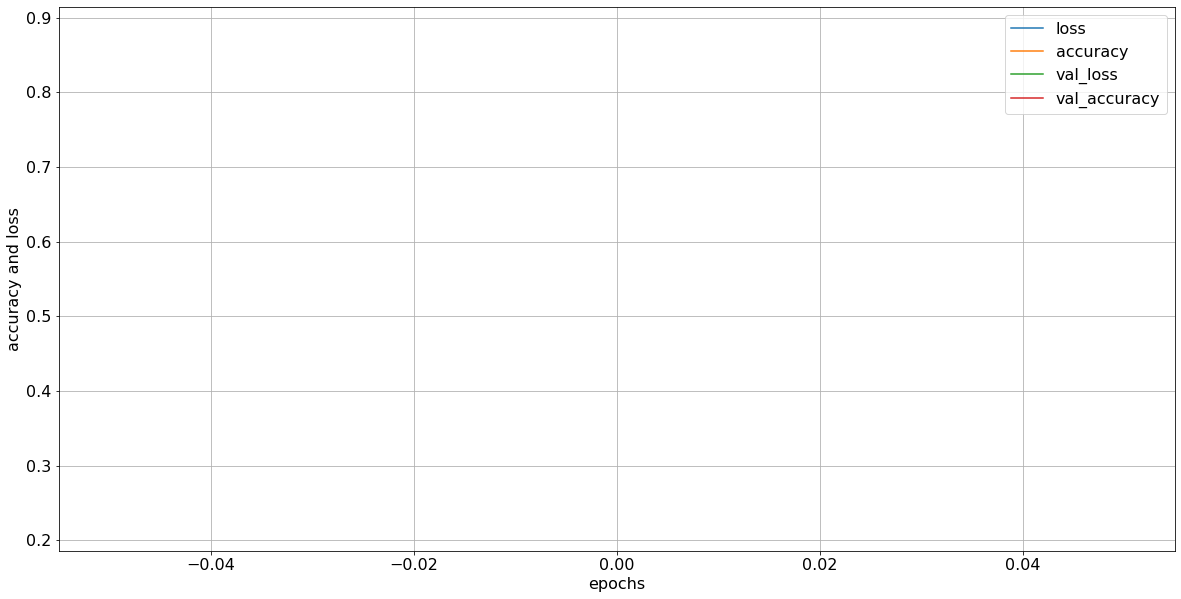

In [ ]:
plot(t2ifit,ylim=None,path='training_t2i.png')



In [ ]:

predict=t2i.predict(x_text_test)


Sample:  2640 

query is: 181+ 23


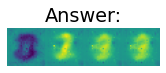

Sample:  4539 

query is: 145+107


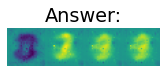

Sample:  1498 

query is:   7+  2


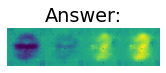

Sample:  2011 

query is:  52+ 37


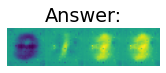

Sample:  444 

query is: 148-  9


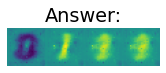

Sample:  2717 

query is:  44+126


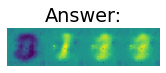

Sample:  531 

query is:  61+ 15


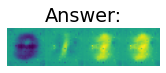

Sample:  3441 

query is:  45+ 82


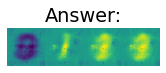

Sample:  46 

query is: 142-  7


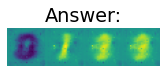

Sample:  1153 

query is:  89+197


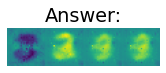

In [ ]:


for i in range(10):
    display_data(np.random.randint(0,5000),x_text_test,predict)